thực hiện import các thư viện 

In [39]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

1. nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu 

In [40]:
data = pd.read_csv('Mall_Customers.csv')

In [41]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2.	Sử dụng biểu đồ tần suất (Histogram) trong thư viện matplotlib để biểu diễn phân phối của lần lượt các thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

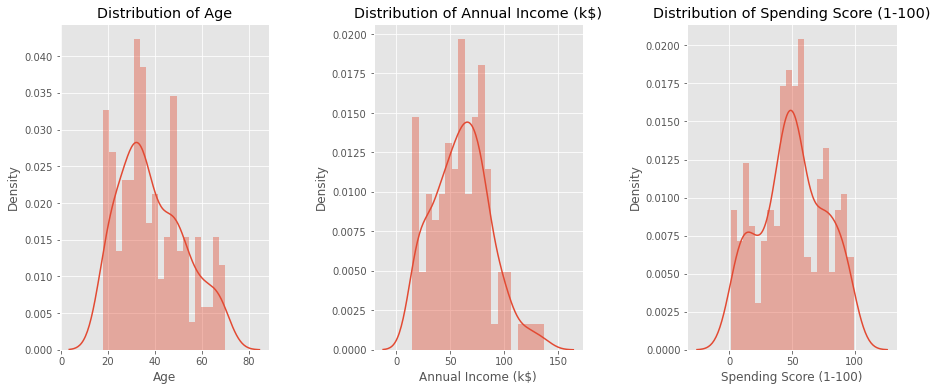

In [42]:
plt.style.use('ggplot')
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distribution of {}'.format(x))
plt.show()

3.	Thống kê số mẫu dữ liệu theo giới tính

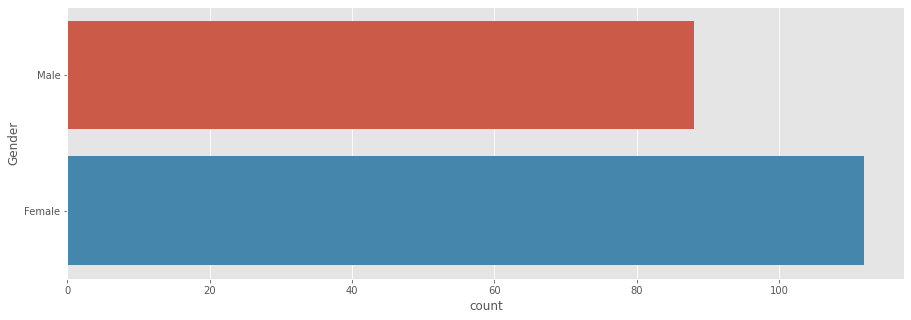

In [43]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y = 'Gender', data = data)
plt.show()

4.	Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và Thu nhập hằng năm theo Giới tính.

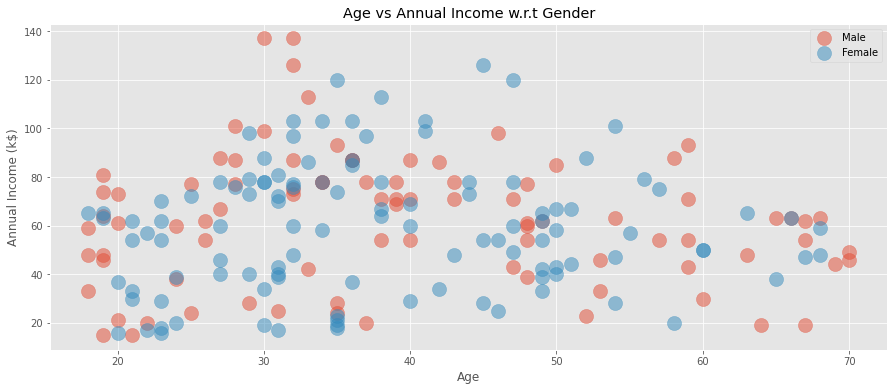

In [44]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=data[data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

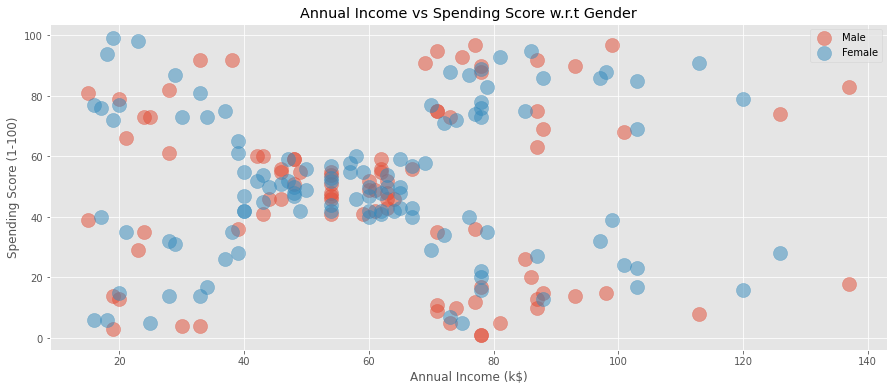

In [45]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data[data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

6.	Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết.

Khảo sát việc gom cụm theo thuộc tính Tuổi và Số điểm mua sắm

In [49]:
X1 = data[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

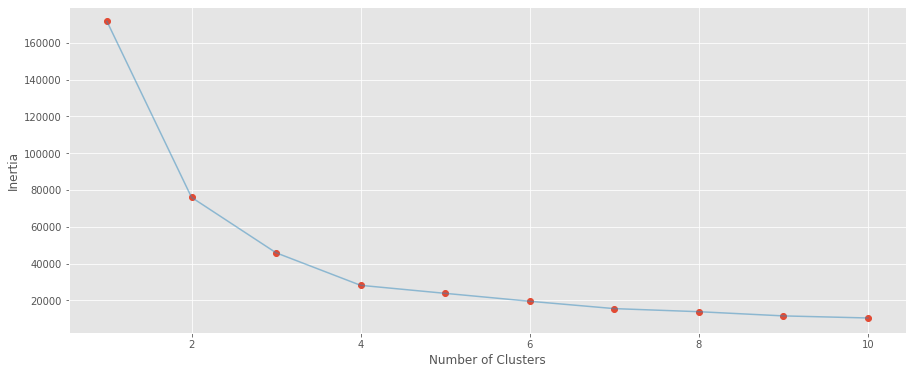

In [50]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4).
Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm

In [51]:
algorithm = KMeans(n_clusters =4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

7.	Biểu diễn kết quả gom cụm bằng biểu đồ

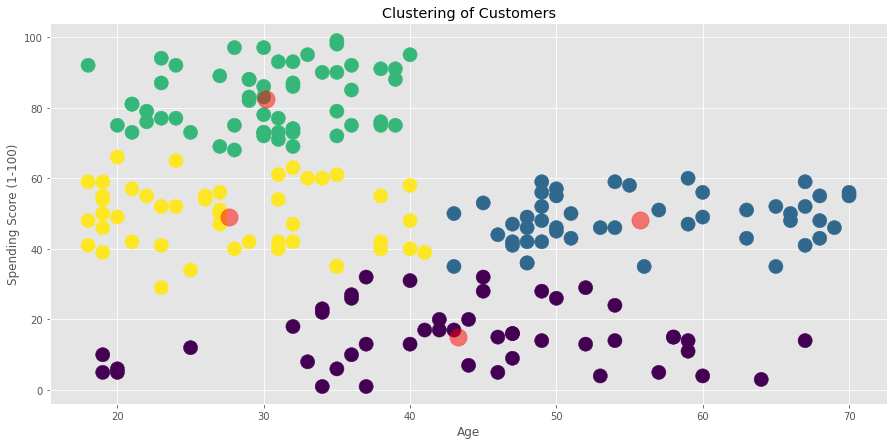

In [52]:
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Age', y='Spending Score (1-100)', data=data, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

8.	Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)

In [55]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753

9.1 Thực hiện tương tự với trường hợp gom cụm theo các thuộc tính:
-	Thu nhập hằng năm và Số điểm mua sắm.


Khảo sát việc gom cụm theo thuộc tính Thu nhập hằng năm và Số điểm mua sắm

In [73]:
X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia1=[]
for n in range (1,11):
    algorithm1 = KMeans(n_clusters =n, init='random')
    algorithm1.fit(X2)
    inertia1.append(algorithm1.inertia_)

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

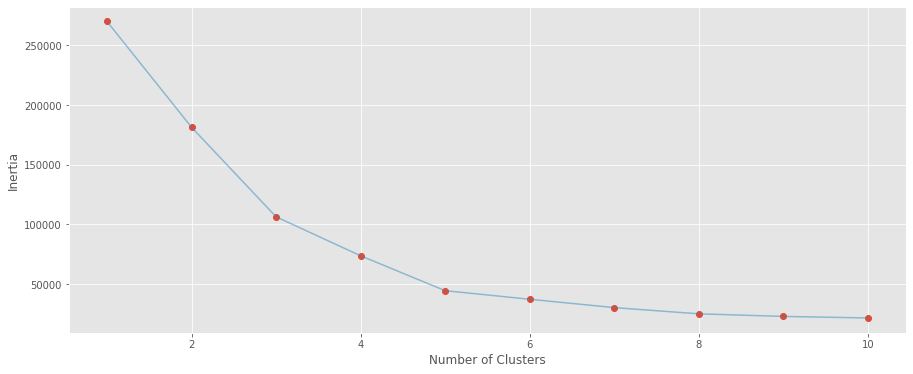

In [74]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia1, 'o')
plt.plot(np.arange(1,11), inertia1, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4).

Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm



In [75]:
algorithm1 = KMeans(n_clusters =4, init='random')
algorithm1.fit(X2)
labels2 = algorithm1.labels_
centroids2 = algorithm1.cluster_centers_

Biểu diễn kết quả gom cụm bằng biểu đồ

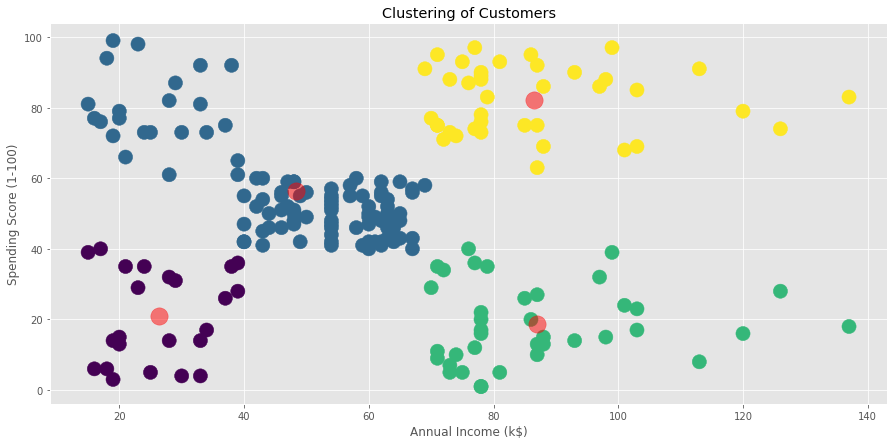

In [76]:
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, s=200, c=labels2)
plt.scatter(centroids2[:,0], centroids2[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Clustering of Customers')
plt.show()

9.2	Sinh viên thực hiện tương tự với trường hợp gom cụm theo các thuộc tính:
-	Tuổi, Thu nhập hằng năm và Số điểm mua sắm.


Khảo sát việc gom cụm theo thuộc tính Tuổi, Thu nhập hằng năm và Số điểm mua sắm

In [77]:
X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia2=[]
for n in range (1,11):
    algorithm2 = KMeans(n_clusters =n, init='random')
    algorithm2.fit(X3)
    inertia2.append(algorithm2.inertia_)

Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

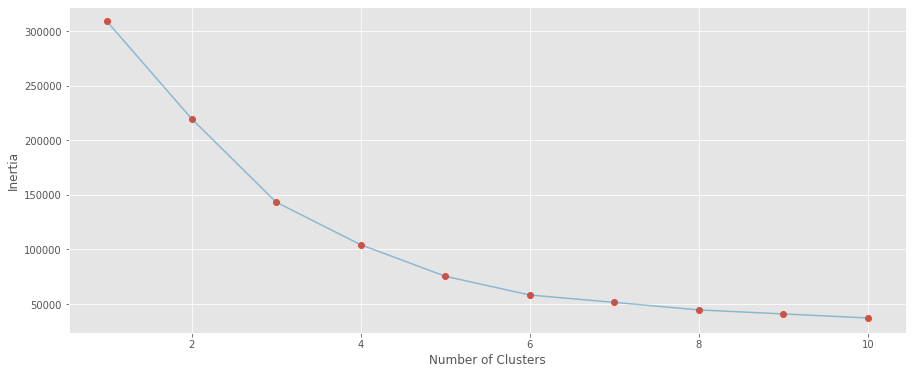

In [78]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia2, 'o')
plt.plot(np.arange(1,11), inertia2, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 6 (k=6).

Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm


In [79]:
algorithm2 = KMeans(n_clusters =6, init='random')
algorithm2.fit(X3)
labels3 = algorithm2.labels_
centroids3 = algorithm2.cluster_centers_

Thực hiện vẽ biểu đồ 3D, biểu diễn kết quả gom cụm Tuổi, Thu nhập hằng năm và Số điểm mua sắm.

In [88]:
data['label3'] = labels3
trace1 = go.Scatter3d(
    x=data['Age'],
    y=data['Annual Income (k$)'],
    z=data['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        size=20,
        color=data['label3'],
        line=dict(
            color=data['label3'],
            width=12
        ),
        opacity=0.8
    )
)
dat=[trace1]
layout = go.Layout(
    title='Clustering of Customers',
    scene=dict(
        xaxis=dict(title='Age'),
        zaxis=dict(title='Spending Score (1-100)'),
        yaxis=dict(title='Annual Income (k$)'),
    )
)
fig = go.Figure(data=dat, layout=layout)
py.offline.iplot(fig)